# Chapter 10 - Classification on Fashion MNIST 

In [21]:
import tensorflow as tf
from tensorflow import keras 

In [22]:
tf.__version__

'2.8.0'

In [23]:
keras.__version__

'2.8.0'

In [24]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [25]:
X_train_full.shape

(60000, 28, 28)

In [26]:
X_train_full.dtype

dtype('uint8')

Split into training and testing sets, but there is no validation set included, we need to make our own. Also, since each of the pixel intensities and valued from 0-255 (integers), these must be scaled in order to use gradient descent to train the network. In this case we can simply divide through by 255. 

In [27]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

Create an array corresponding to the target classes in the dataset to make comparing instances easier (says the clothing item rather than a number).

In [28]:
class_names = [
    't-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot'
]

In [29]:
class_names[y_train[0]]

'coat'

Build network using the ```Sequential``` API

In [30]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

1. A sequential model is the simplest kind of Keras model for ANNs. Composed of a single stack of layers connected in sequence
2. The flatten layer takes the [28,28] array and converts it into a one dimensional array of length 784
3. Dense hidden layer with 300 neruons using the relu activation function. Each dense layer manages its own weight matrix, and the vector of bias terms(one oper neuron). When it receives data, it computes:

$ h(X) = \phi(XW + b) $

4. Second dense layer with 100 neurons 
5. Dense output layer with 10 neurons using the softmax activation function to handle multiclass classification

<i>Note, activation='relu' is the same as activation=keras.activations.relu<i> 

The ```Summary()``` method displays all of the model's layers, including names (which can be specified), the output shape, and the number of parameters. The cell ends with the total number of trainable and non-trainable parameters.
- The first hidden layer has 784x300 + 300 parameters
- The second hidden layer has 300x100 + 100 parameters
- The output layer has 100x10 + 10 parameters

This large number of parameters gives the model flexibility to fit the training data, but also runs the risk of overfitting

In [31]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 300)               235500    
                                                                 
 dense_6 (Dense)             (None, 100)               30100     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Can also fetch layers individually

In [32]:
model.layers

In [33]:
hidden1 = model.layers[1]
hidden1.name

'dense_5'

All parameters of a layer can be accessed or changed by the ```get_weights()``` and ```set_weights()``` methods. For dense layers, this includes both connection weights and the bias terms

In [35]:
weights, biases = hidden1.get_weights()
weights

array([[-0.06973743,  0.03022268,  0.00787708, ..., -0.06169983,
         0.06507325, -0.06707786],
       [ 0.05229227, -0.01831034,  0.04437585, ...,  0.05680779,
         0.00692124, -0.05088422],
       [-0.05802464,  0.05243388, -0.06587885, ..., -0.04469822,
         0.04606741,  0.04675977],
       ...,
       [ 0.0259416 ,  0.04164015,  0.02632207, ..., -0.01158979,
        -0.03016219,  0.06555636],
       [ 0.05157621,  0.05726978, -0.0645757 , ..., -0.01540582,
         0.04861944, -0.03078499],
       [-0.07425401, -0.06731239, -0.07249878, ..., -0.04195371,
         0.0311972 , -0.05528462]], dtype=float32)

In [36]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

All weights are initialized randomly, and all biases are set to 0 at the outset of training. A different initialization method can be chosen by setting ```kernel_initializer``` or ```bias_initializer``` when creating the layer. 

Once the model is created, it needs to be compiled by calling ```compile()``` to specify the loss function and the optimizer to use. Other metrics to compute during training and evaluation can also be specified. 

In [37]:
model.compile(
    loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy']
)

Using ```loss='sparse_categorical_crossentropy'``` is the same as using ```loss=keras.losses.sparse_categorical_crossentropy```

```opimizer = 'sgd'``` is the same as ```optimizer = keras.optimizers.SGD()```

Using sparse categorical crossentropy since the labels are sparse (single target class index from 0-9 in this case), and the classes are exclusive. If instead we had one target probability per class (ex. one hot vectors), then categorical_crossentropy would be used instead. Binary or multilabel binary classification would use the sigmoid activation function in the output layer instead of softmax, and binary_crossentropy loss. 

To change to sparse labels (categorical) from one-hot: ```keras.utils.to_categoricals()```

To change to one-hot from sparse labels: ```np.argmax()``` with ```axis=1``` 

Using the ```SGD``` optimizer means training with stochastic gradient descent, keras performs backpropagation algorithm (reverse-mode autodiff plus gradient descent).

In practice, the learning rate is usually tuned and set as ```optimizer = keras.optimizers.SGD(lr=?)```, the default value is 0.01

When the model is ready to be trained, call the fit method on the training data

In [38]:
history = model.fit(
    X_train, y_train, epochs=30, validation_data=(X_valid, y_valid)
)

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6962 - accuracy: 0.7716 - val_loss: 0.4960 - val_accuracy: 0.8348
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4841 - accuracy: 0.8316 - val_loss: 0.4721 - val_accuracy: 0.8410
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4407 - accuracy: 0.8461 - val_loss: 0.4145 - val_accuracy: 0.8552
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4139 - accuracy: 0.8552 - val_loss: 0.4226 - val_accuracy: 0.8540
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3960 - accuracy: 0.8603 - val_loss: 0.3823 - val_accuracy: 0.8708
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3799 - accuracy: 0.8670 - val_loss: 0.3853 - val_accuracy: 0.8668
Epoch 7/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3648 - accuracy: 0.8718 - val_loss: 0.3695 - val_accuracy:

Instead of passing a validation dataset directly to the fit function, you could instead use the ```validation_split``` parameter which takes a proportion (ex. 0.1) of the training dat provided to use as the validation set.  

If the training data is very skewed, you can also use the ```class_weight``` parameter when calling the ```fit()``` method to give larger weight to underrepresented classes. These are used by Keras when computing the loss.

The ```fit()``` method returns a ```history``` object containing the training parameters, ```history.params```, the list of epochs through history ```history.epoch```, and a dictionary, ```history.history```, containing the loss and extra metrics it measured at the end of each epoch on the training set and the validation set if applicable. This can be used to create a dataframe and plot metrics overtime through training and to create learning curves.  

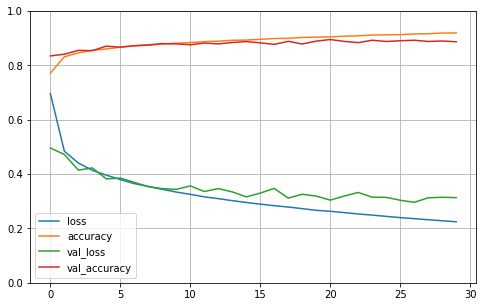

In [40]:
import pandas as pd 
import matplotlib.pyplot as plt 

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Both training and validation accuracy increase over time, while the training and validation loss decrease. The validation data and training data are also not too far off from each other, suggesting that there is not much overfitting happening on the training data.

It also appears that the model performed better on the validation set at the beginning of training, but this is not the case. The validation error is computed at the end of each epoch, while the training error is computed during each epoch, so the training curve should be shifted by half an epoch to the left. 

It also looks like the model has not quite converged yet, so more training could be done in order to increase accuracy. You could just call the ```fit()``` method again to resume where you left off. 

To further improve the model, the hyperparameters should be tuned - starting always with the learning rate. Otherwise, you could try another optimizer, and then try to change the model archetecture, such as the number of layers, neurons per layer, and the activation functions. You could also change parameters such as batch size (which is set in the ```fit()``` method with a default of 32). 

Once a satisfactory accuracy is reached on the validation data, it should be evaluated on the test set. This is done using the ```evaluate()``` method. 

In [41]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3473 - accuracy: 0.8742


[0.34729471802711487, 0.8741999864578247]